# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import math

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
# Load data
absences = pd.read_csv("../data/absences.csv", index_col=0)

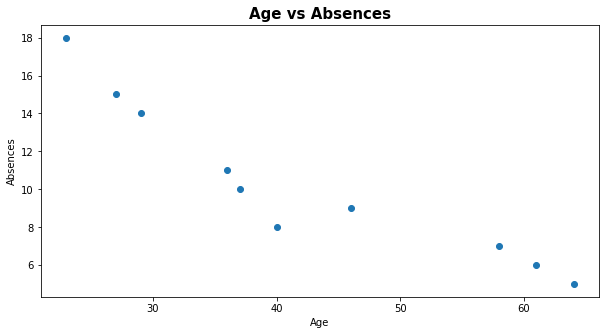

In [3]:
# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(absences["Age"], absences["Absences"])
plt.title("Age vs Absences", fontsize=15, fontweight=700)
plt.xlabel("Age")
plt.ylabel("Absences")
plt.show()

**`Answer`**

It looks like they have a linear negative relationship. The number of absences decreases as age increases. 

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [4]:
# Define a function to compute slope and intercept
def regression_line(x, y):
    # Mean Values
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    # Slope
    numerator = sum([(xi - x_mean) * (yi - y_mean) for xi, yi in zip(x,y)])
    denominator =  sum([(xi - x_mean)**2 for xi in x])
    slope = numerator / denominator
    # Intercept
    intercept = y_mean - (slope * x_mean)
    return slope, intercept

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [5]:
# Find slope and intercept
slope, intercept = regression_line(absences['Age'], absences['Absences'])
print(f"The slope is {round(slope,2)} and the intercept is {round(intercept,2)}.")

The slope is -0.27 and the intercept is 21.59.


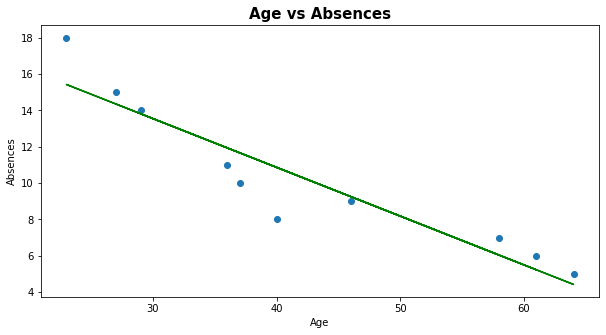

In [6]:
# Plot the regression line
plt.figure(figsize=(10,5))
plt.scatter(absences["Age"], absences["Absences"])
plt.plot(absences["Age"], absences['Age']* slope + intercept, c = 'g')
plt.title("Age vs Absences", fontsize=15, fontweight=700)
plt.xlabel("Age")
plt.ylabel("Absences")
plt.show()

**`Answer`**

The regression line we have computed fits the data.

The slope of the regression is negative so we can confirm that age and absences have a linear negative relationship.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [7]:
# Define a function to compute correlation and covariance
def correlation_and_covariance(x, y):
    # Mean Values
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    # Correlation
    numerator = sum([(xi - x_mean) * (yi - y_mean) for xi, yi in zip(x,y)])
    denominator =  math.sqrt(sum([ (xi - x_mean)**2 for xi in x]) * sum([ (yi - y_mean)**2 for yi in y]))
    correlation = numerator / denominator
    # Covariance
    covariance = (1/(len(x)-1)) * sum([xi*yi - x_mean * y_mean for xi, yi in zip(x, y)])
    return correlation, covariance

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [8]:
# Find correlation and covariance
correlation, covariance = correlation_and_covariance(absences['Age'], absences['Absences'])
print(f"The correlation is {round(correlation,2)} and the covariance is {round(covariance,2)}.")

The correlation is -0.93 and the covariance is -57.7.


**`Answer`**

Correlation measures the strength of association between two variables and its value ranges from -1 to 1. The correlation between age and absences is -0.93. The value is really close to -1 which indicates a strong negative linear relationship between both variables. 

Covariance values are difficult to interpret because the relationship's strength depends on the units in which covariance is measured. However, positive and negative covariance values indicate positive and negative relationships. In this case, the negative covariance indicates a negative relationship between both variables. 

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

**`Answer`**

From our results, we can say that age is an indicator of absenteeism. 

All metrics show a negative linear relationship between age and absences, so when age increases, absences decrease.

However, to confirm that age is an indicator of absenteeism, we should repeat the same analysis using more data points, as calculations based on 10 observations are not enough to confirm the statement.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [9]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [10]:
# Find correlation and covariance
correlation, covariance = correlation_and_covariance(ironbeers_df['X'], ironbeers_df['Y'])
print(f"The correlation is {round(correlation,2)} and the covariance is {round(covariance,2)}.")

The correlation is 0.98 and the covariance is 12.0.


**`Answer`**

The correlation between the number of people that you told to stay and the number of people that stayed is 0.98. The value is really close to 1 which indicates a strong positive linear relationship between both variables. So the more people you tell to stay, the more people stays.  

The positive covariance indicates a positive relationship between both variables. 

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

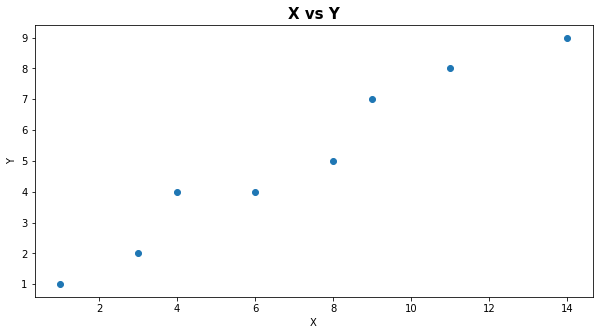

In [11]:
# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(ironbeers_df["X"], ironbeers_df["Y"])
plt.title("X vs Y", fontsize=15, fontweight=700)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**`Answer`**

It looks like there is a positive relationship between both variables. 

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [12]:
# Find the regression line
slope, intercept = regression_line(ironbeers_df['X'], ironbeers_df['Y'])
print(f"The slope is {round(slope,2)} and the intercept is {round(intercept,2)}.")

The slope is 0.64 and the intercept is 0.55.


**`Answer`**

The slope indicates that there is a positive relationship between both variables. 

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

**`Answer`**

The data shows that the more people you tell to stay, the more people stays. We don't know if there is a cause-effect relationship between them but they seem to increase together. 

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [13]:
# Find expected Y
ironbeers_df['expected_Y'] =  ironbeers_df['X'] * slope + intercept
ironbeers_df

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [14]:
# Find the error
ironbeers_df['error'] =  abs(ironbeers_df['Y'] - ironbeers_df['expected_Y'])
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,0.181818
1,3,2,2.454545,0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,0.363636
4,8,5,5.636364,0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,0.454545


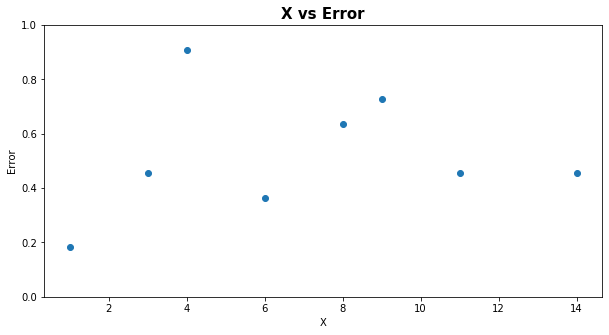

In [15]:
# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(ironbeers_df["X"], ironbeers_df["error"])
plt.title("X vs Error", fontsize=15, fontweight=700)
plt.xlabel("X")
plt.ylabel("Error")
plt.ylim([0,1])
plt.show()

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

**`Answer`**

Most of the errors are between 0.2 and 0.5. However, there are three cases in which the error is in a higher range between 0.6 and 0.9. 

#### 4.- Remove the points with a high error and recalculate the regression line.

In [16]:
ironbeers_df = ironbeers_df[ironbeers_df['error'] < 0.5].copy()
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.181818,0.181818
1,3,2,2.454545,0.454545
3,6,4,4.363636,0.363636
6,11,8,7.545455,0.454545
7,14,9,9.454545,0.454545


In [17]:
# Find the regression line
slope, intercept = regression_line(ironbeers_df['X'], ironbeers_df['Y'])
print(f"The slope is {round(slope,2)} and the intercept is {round(intercept,2)}.")

The slope is 0.65 and the intercept is 0.23.


In [18]:
# Find the expected values
ironbeers_df['expected_Y'] =  ironbeers_df['X'] * slope + intercept

In [19]:
# Compute the error
ironbeers_df['error'] =  abs(ironbeers_df['Y'] - ironbeers_df['expected_Y'])
ironbeers_df

,X,Y,expected_Y,error
0,1,1,0.884746,0.115254
1,3,2,2.189831,0.189831
3,6,4,4.147458,0.147458
6,11,8,7.410169,0.589831
7,14,9,9.367797,0.367797


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [20]:
correlation, covariance = correlation_and_covariance(ironbeers_df['X'], ironbeers_df['Y'])
print(f"The correlation is {round(correlation,2)} and the covariance is {round(covariance,2)}.")

The correlation is 0.99 and the covariance is 19.25.


**`Answer`**

By removing outliers the regression line fits better the data points. Removing outliers also increases the correlation strength. 